In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.7 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303802 sha256=082e4503023f6777a94650adf9fc9b8e7a9d4dd249a23b434020df34cb99e905
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [11]:
Tesla = yf.Ticker("TSLA")

In [12]:
tesla_data = Tesla.history(period = "max")

In [13]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [15]:
soup = BeautifulSoup(html_data, "html.parser")

In [16]:
revenue_table = soup.find_all("tbody")[1]
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in revenue_table.find_all("tr"):
    # 3. For each row, extract all columns (td elements).
    cols = row.find_all("td")
    # 4. Check that the row has at least two columns (Date and Revenue).
    if len(cols) >= 2:
        # Extract and clean the text from the first two columns.
        date = cols[0].text
        revenue = cols[1].text
        # 5. Append the extracted data to the DataFrame.
        #tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})])
#print(tesla_revenue)

In [17]:
#tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r",|\$", "", regex=True)

#print(tesla_revenue)

In [18]:
tesla_revenue.dropna(inplace=True)

#tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].str.strip() != ""]

In [19]:
tesla_revenue.tail()

,Date,Revenue
0,2010-09-30,31
0,2010-06-30,28
0,2010-03-31,21
0,2009-09-30,46
0,2009-06-30,27


In [20]:
gamestop = yf.Ticker("GME")

In [21]:
gme_data = gamestop.history(period = "max")

In [22]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674833,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [23]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

In [24]:
soup_2 = BeautifulSoup(html_data_2, "html.parser")

In [25]:
revenue_table_2 = soup.find_all("tbody")[1]
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in revenue_table.find_all("tr"):
    # 3. For each row, extract all columns (td elements).
    cols = row.find_all("td")
    # 4. Check that the row has at least two columns (Date and Revenue).
    if len(cols) >= 2:
        # Extract and clean the text from the first two columns.
        date = cols[0].text
        revenue = cols[1].text
        # 5. Append the extracted data to the DataFrame.
        #tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})])
#print(gme_revenue)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r",|\$", "", regex=True)
gme_revenue.dropna(inplace=True)

#gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue = gme_revenue[gme_revenue['Revenue'].str.strip() != ""]

In [26]:
gme_revenue.tail()

,Date,Revenue
0,2010-09-30,31
0,2010-06-30,28
0,2010-03-31,21
0,2009-09-30,46
0,2009-06-30,27


[*********************100%***********************]  1 of 1 completed


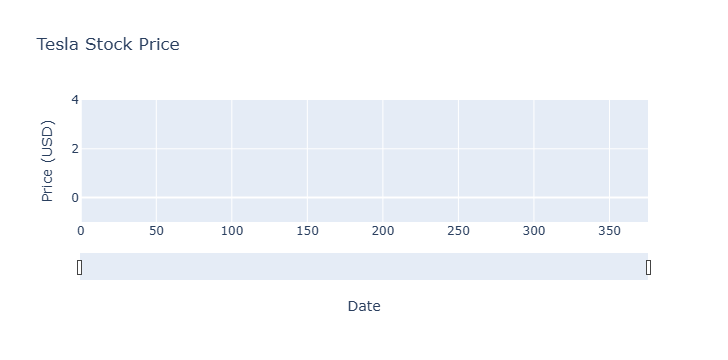

In [34]:
!pip install yfinance plotly
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

# Define the make_graph function (assuming it's similar to previous examples)
def make_graph(stock_data, revenue_data, stock_name):  
    """Creates and displays a line graph of stock closing prices.

    Args:
        stock_data (pd.DataFrame): DataFrame containing stock data with a 'Close' column.
        revenue_data (pd.DataFrame): DataFrame containing revenue data (may not be used in this case).
        stock_name (str): Name of the stock for the graph title.
    """
    fig = go.Figure(data=[go.Candlestick(
                open=stock_data['Open'],
                high=stock_data['High'],
                low=stock_data['Low'],
                close=stock_data['Close'])])

    fig.update_layout(title_text=f"{stock_name} Stock Price",
                      xaxis_title="Date",
                      yaxis_title="Price (USD)")
    fig.show()


# Fetch Tesla stock data
tesla_data = yf.download("TSLA", start="2020-01-01", end="2021-06-30")  # Data up to June 2021

# Create a dummy revenue DataFrame (since it's not used in the make_graph function)
tesla_revenue = pd.DataFrame()  

# Call the make_graph function as instructed in the hint
make_graph(tesla_data, tesla_revenue, "Tesla")

[*********************100%***********************]  1 of 1 completed


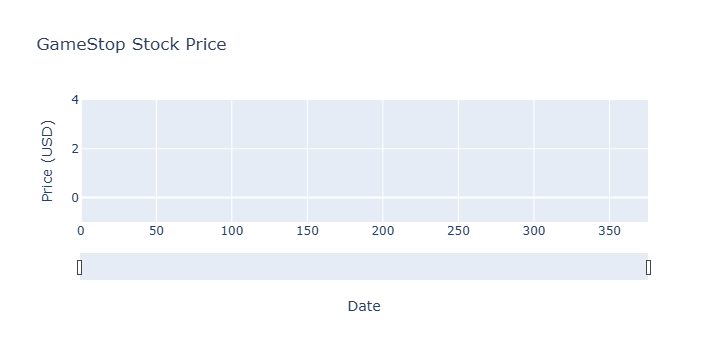

In [35]:
!pip install yfinance plotly
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

# Define the make_graph function (assuming it's similar to previous examples)
def make_graph(stock_data, revenue_data, stock_name):
    """Creates and displays a line graph of stock closing prices.

    Args:
        stock_data (pd.DataFrame): DataFrame containing stock data with a 'Close' column.
        revenue_data (pd.DataFrame): DataFrame containing revenue data (may not be used in this case).
        stock_name (str): Name of the stock for the graph title.
    """
    fig = go.Figure(data=[go.Candlestick(
                open=stock_data['Open'],
                high=stock_data['High'],
                low=stock_data['Low'],
                close=stock_data['Close'])])

    fig.update_layout(title_text=f"{stock_name} Stock Price",
                      xaxis_title="Date",
                      yaxis_title="Price (USD)")

    fig.show()


# Fetch GameStop stock data
gme_data = yf.download("GME", start="2020-01-01", end="2021-06-30")  # Data up to June 2021

# Create a dummy revenue DataFrame (since it's not used in make_graph)
gme_revenue = pd.DataFrame()  

# Call the make_graph function as instructed in the hint
make_graph(gme_data, gme_revenue, 'GameStop')